In [ ]:
# Analysis of Bank Stock Prices
Stock price analysis of six major U.S. banks from January 2006 up to January 2016, with a focus on the 2008 Economic Crash. Due to problems with Google Finance API, data for this project was derived from Yahoo Finance using Pandas DataReader. 

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
from pandas_datareader import data,wb
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams.update({'font.size' : 15})
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

Using Yahoo Finance API and pandas datareader, we pull the stock data on six major US based investment banks (Bank of America, Goldman Sachs, Citigroup, Morgan Stanley, Wells Fargo, and JP Morgan) 
from January 1st, 2006 to January 1st, 2016. 

In [2]:


BAC = data.DataReader("BAC", 'yahoo', start, end)
GS  = data.DataReader("GS", 'yahoo', start, end)
C = data.DataReader("C", 'yahoo', start, end)
MS = data.DataReader("MS", 'yahoo', start, end)
WFC = data.DataReader("WFC", 'yahoo', start, end)
JPM = data.DataReader("JPM", 'yahoo', start, end)

A dataframe with the stock prices for all six banks from 1/1/2006 to 1/1/2016 is created via concatenation. 

In [3]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   36.147552  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.763645  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.809727  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.755962  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.779007  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  38.834549  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  38.861198  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  38.967754  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  39.007713  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  39.420616  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  21.693670  
2006-01-04   31.799999  31.530001  10870000.0  21.442055  
2006-01-05   31.500000  31.495001  10158000.0  21.418251  
2006-01-06   31.580000  31.680000   8403800.0  21.544062  
2006-01-09   31.674999  31.674999   5619600.0  21.540665  

[5 rows x 36 columns]

Prior to conducting exploratory analysis of our data, we check for any missing values in the dataframe

In [4]:
null_rows = bank_stocks.isnull().any(axis=1)
bank_stocks[null_rows]

Empty DataFrame
Columns: [(BAC, High), (BAC, Low), (BAC, Open), (BAC, Close), (BAC, Volume), (BAC, Adj Close), (C, High), (C, Low), (C, Open), (C, Close), (C, Volume), (C, Adj Close), (GS, High), (GS, Low), (GS, Open), (GS, Close), (GS, Volume), (GS, Adj Close), (JPM, High), (JPM, Low), (JPM, Open), (JPM, Close), (JPM, Volume), (JPM, Adj Close), (MS, High), (MS, Low), (MS, Open), (MS, Close), (MS, Volume), (MS, Adj Close), (WFC, High), (WFC, Low), (WFC, Open), (WFC, Close), (WFC, Volume), (WFC, Adj Close)]
Index: []

[0 rows x 36 columns]

To begin our exploratory analysis of the data, we first check the highest closing price for each bank

In [5]:
bank_stocks.xs('Close', level='Stock Info', axis=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In order to check the profitability of each bank stock, we create a new dataframe called 'returns' which documents the daily changes in the stock price for each bank. To better understand the relationship between the return values for each bank, we create a pairplot. 

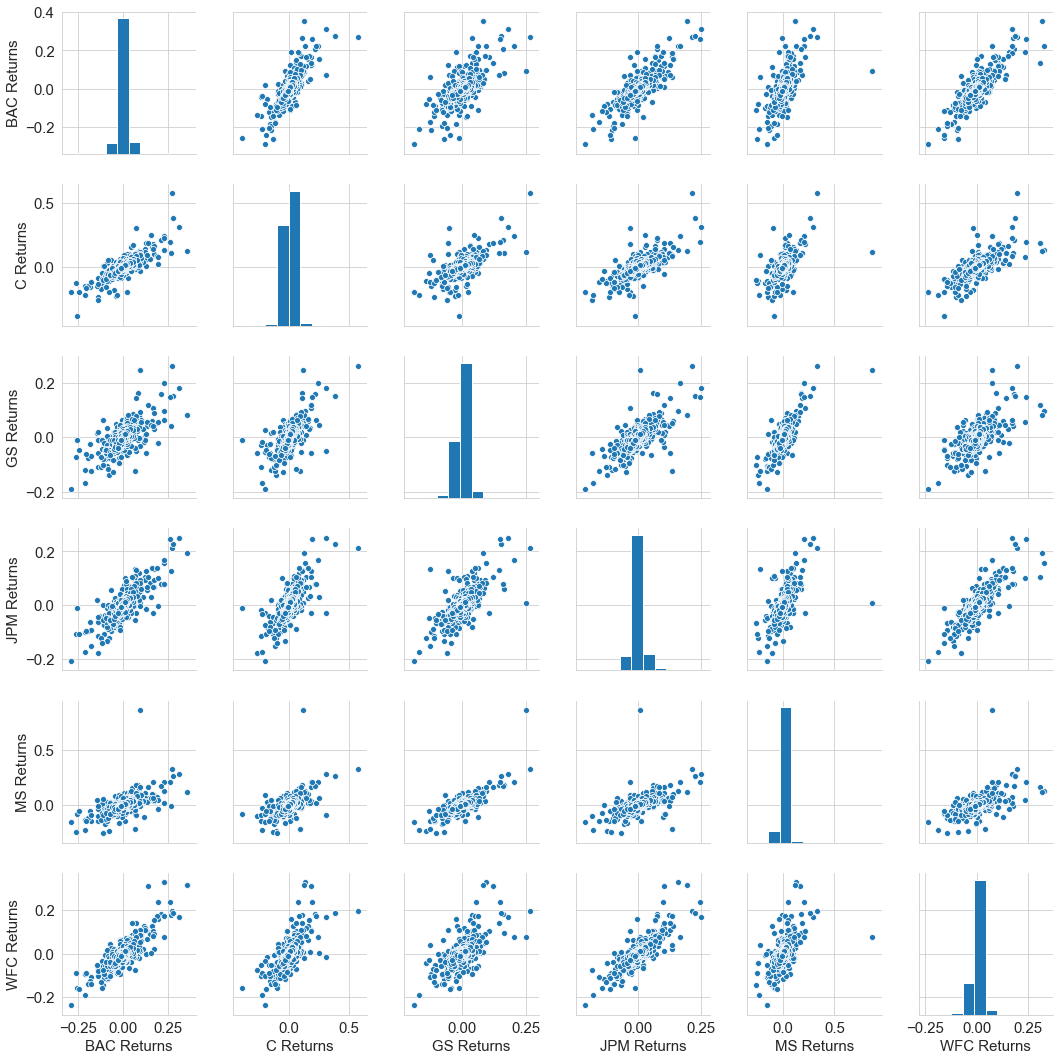

In [6]:
returns=pd.DataFrame()
for tick in tickers:
    returns[tick + ' Returns'] = bank_stocks[tick]['Close'].pct_change()
sns.pairplot(returns[1:])
#Pairplot explores the relationship between two variables 

Below the day on which each bank registered its biggest gain is shown by returns.idxmax(). Likewise, the biggest loss is indicated by returns.idxmin()

In [7]:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

In [8]:
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

Since the standard deviation is the benchmark measurement of volatility, we calculate the standard deviation for the returns of each bank. Citigroup stock registers the largest standard deviation value meaning that from 2006 to 2016, the bank's returns were subject to more volatility than the other 5. In 2015, the title of the most volatile stock went to Morgan Stanley (1.625 % deviation from average) followed closely by Bank of America (1.616 %).

In [9]:
returns.std()

BAC Returns    0.036647
C Returns      0.038672
GS Returns     0.025390
JPM Returns    0.027667
MS Returns     0.037819
WFC Returns    0.030238
dtype: float64

In [10]:
returns.loc['2015-01-01':'2016-01-01'].std()

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

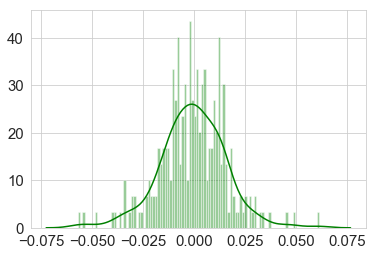

In [11]:
#Distribution of Morgan Stanley Returns in 2015
sns.distplot(tuple(returns.loc['2015-01-01':'2016-01-01']['MS Returns']),color='green', bins = 100)

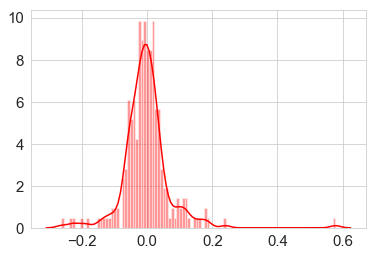

In [12]:
#Distribution of Citigroup returns in 2008
sns.distplot(tuple(returns.loc['2008-01-01':'2009-01-01']['C Returns']),color='red', bins = 100)

To illustrate the overall behaviour of each bank stock from 2006 to 2016, we create a chart below.

Text(0, 0.5, 'Price ($)')

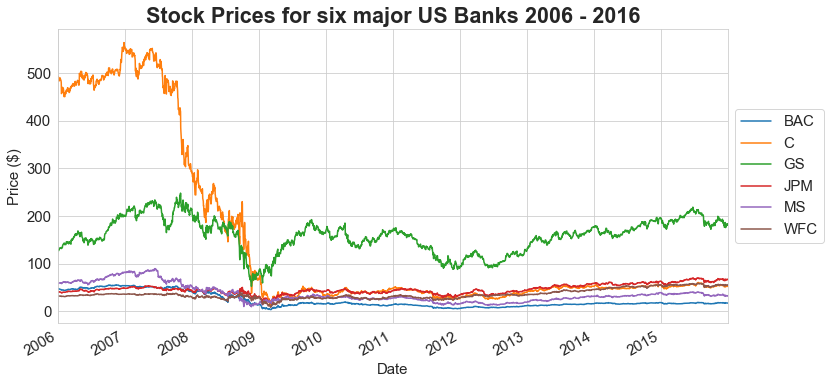

In [13]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,6),label=tick)
plt.title('Stock Prices for six major US Banks 2006 - 2016')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Price ($)')
#plt.tight_layout()


To create a more interactive visual of the plot above, we use the plotly library.

In [14]:
#CREATE A PLOTLY AND SAY THAT YOU ARE CREATING IT TO PROVIDE A MORE INTERACTIVE VISUAL
import plotly.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [15]:

days = pd.date_range(start, end, freq='D')
WFCcl=bank_stocks['WFC']['Close']
Ccl=bank_stocks['C']['Close']
BACcl=bank_stocks['BAC']['Close']
GScl=bank_stocks['GS']['Close']
MScl=bank_stocks['MS']['Close']
JPMcl=bank_stocks['JPM']['Close']

In [16]:

def plotfunc(banklist, colorlist,symbols):
    dat = []
    for bank,color,ticker in zip(banklist, colorlist,tickers):
        trace = go.Scatter(
            x = days,
            y = bank,
            name = '{} Stock Prices'.format(ticker),
                line = dict(
                    color = (color),
                    width = 2))
        dat.append(trace)
    return iplot({"data": dat,
                     "layout": go.Layout(title="Closing Stock Prices for Six Major US Banks",
                                        xaxis = dict(title = 'Date'),
                                          yaxis = dict(title = 'Stock Price ($)'))})       
   

In [17]:
banks = [BACcl, Ccl, GScl, JPMcl, MScl, WFCcl]
colorlist = ['rgb(220,20,60)','rgb(22, 96, 167)', 'rgb(135,206,250)','rgb(0,0,128)', 'rgb(119,136,153)', 'rgb(255,215,0)']

In [18]:
plotfunc(banks,colorlist,tickers)

# Technical Analysis



One of the most widely used indicators in technical analysis of stock prices is the moving average, which gives a smoothed down depiction of the stock price behavior. 
Below we calculate the 30 day moving averages for all six major U.S. based banks in the year 2008. 


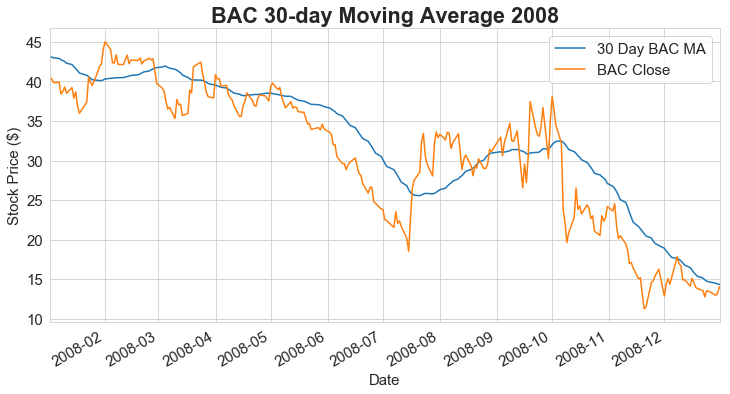

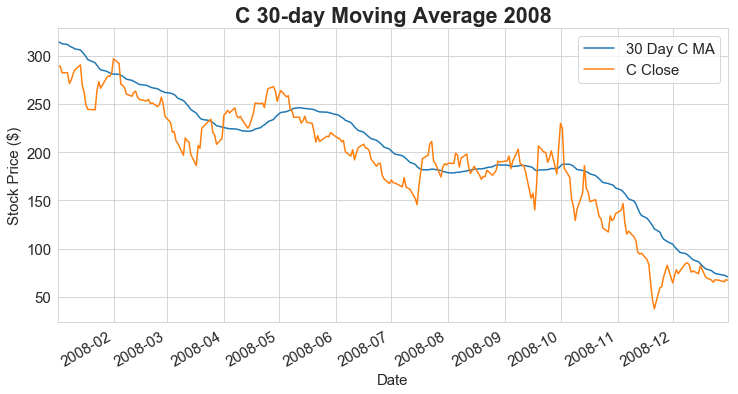

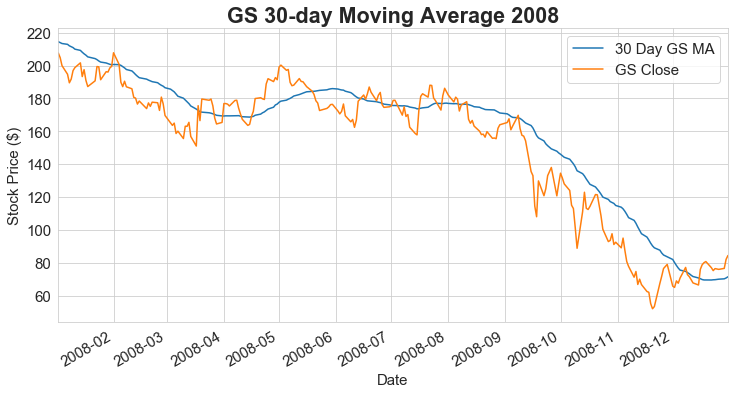

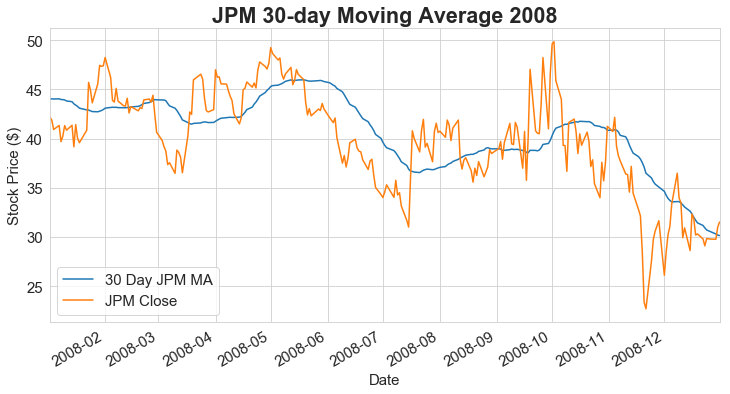

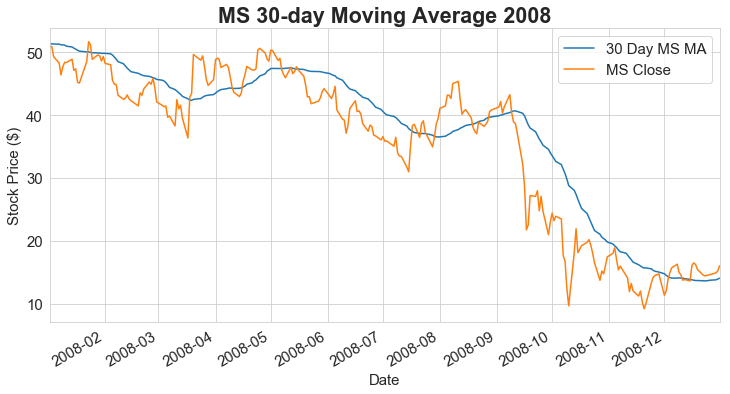

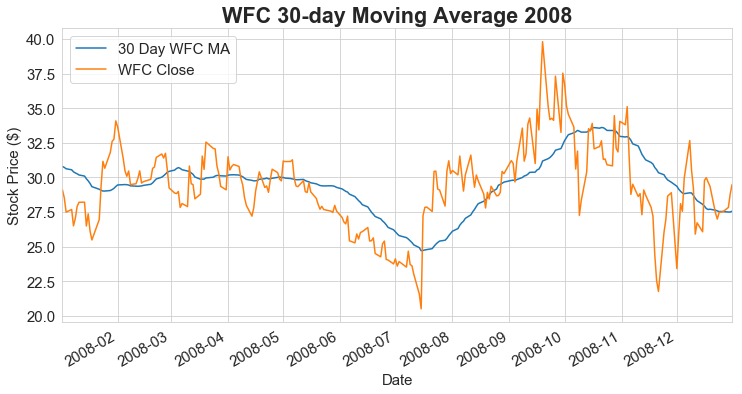

In [19]:
#Moving Averages for all banks 2008
for bank,ticker in zip(banks,tickers):
    plt.figure(figsize=(12,6))
    
    bank.rolling(window=30).mean()['2008-01-01':'2009-01-01'].plot(label='30 Day {} MA'.format(ticker))
    bank['2008-01-01':'2009-01-01'].plot(label='{} Close'.format(ticker))
    plt.title('{} 30-day Moving Average 2008'.format(ticker))
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.legend()
    

A heatmap is created below to illustrate the relation between all six banks. 

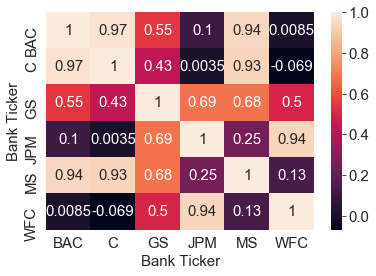

In [20]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Given that Citigroup stock experienced a steep fall in its stock price during the 2008 Recession, the remainder of this section 
is dedicated the analysis of this specific bank. 

One of the reasons why moving averages, especially simple moving averages, are such important analytical tools is because they are used to indicate 
important trading patterns, namely the death cross and the golden cross. A death cross occurs when the 50 day simple moving average 
falls below the 200 day simple moving average, thus indicating the onset of the bear market. Likewise, when the 50 day SMA breaks above 200 day SMA, 
the golden cross occurs signalling the onset of the bull market and the potential for gains. 

Furthermore, a candlestick plot is another widely used analysis tool is finance. Developed in 18th century Japan to measure the changes in the price of rice, candlestick plot is nowadays used to monitor the price fluctuations 
of an asset. With each bar representing a single trading day, a green bar is an indication of a bullish pattern, meaning that the closing price of asset was above the opening price. If the bar is red, then the asset behaved in a bearish manner on that 
specific date, i.e., the assets closing price was lower than its opening price. 

In the graph below we combine both the candlestick plot, the graph of 50 and 200 day simple moving averages,as well as flunctuations in total volume traded to illustrate the Citigroup stock behaviour from 
January 1st, 2006 to January 1st, 2010. The abundance of red bars is a clear indicator of a strong bear market, which makes sense given the 2008 Economic Crash. Additionally, 
a death cross can be observed in the early days of August 2008, during the onset of the financial crisis, and a slight recovery in the stock price
indicated by a golden cross in October 2009. 


In [21]:

#C['Close']['2006-01-01':'2010-01-01'].ta_plot(study='sma',periods=[50,200],title='Simple Moving Averages', study_colors=['red','blue'])

To further analyse the price of the Citigroup stock and its downfall during the 2008 Recession, we turn to the Candlestick plot
of the stock from January 1st, 2006 to January 1st, 2010.

In [22]:

#C[['Open', 'High', 'Low', 'Close']]['2006-01-01':'2010-01-01'].iplot(kind='candle')

In [23]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.ticker as mticker 


In [24]:
def movingaverages(data,window):
    return data['Close'].rolling(window).mean()

def CandleandSMA(banks,tickers, MA1, MA2):
    for bank,ticker in zip(banks,tickers):
        bank.reset_index(inplace=True) #maybe set this before the function while reading in the data
        date=mdates.date2num(bank['Date'].dt.to_pydatetime())
        openp=bank['Open']
        closep=bank['Close']
        highp=bank['High']
        lowp=bank['Low']
        volume=bank['Volume']

        VolumeMin= 0
        startingpt=len(date[MA2-1:])

        x = 0
        y= len(date)   
        CandleArray = []
        while x<y:
            CandleData= date[x],openp[x],highp[x], lowp[x], closep[x], volume[x]  #HAS TO BE IN DATE,OPEN,HIGH,LOW,CLOSES FORMAT!!!
            CandleArray.append(CandleData)
            x+=1

        av1=movingaverages(bank,MA1)
        av2=movingaverages(bank,MA2)

        plt.figure(figsize=(20,10))

        ax1=plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
        candlestick_ohlc(ax1, CandleArray, width=1, colorup='g', colordown='r')
        ax1.plot(date[-startingpt:],av1[-startingpt:],label='{} day MA'.format(MA1))  
        ax1.plot(date[-startingpt:],av2[-startingpt:],label='{} day MA'.format(MA2) ) 
        ax1.grid(True)
        ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.ylabel('Stock Price')
        plt.legend(loc=3,fancybox=True)


        ax2=plt.subplot2grid((4,4), (3,0), sharex=ax1, rowspan=1, colspan=4)
        ax2.plot(date,volume, color='#23415F', linewidth=1)
        ax2.fill_between(date,VolumeMin, volume, facecolor='#23415F', alpha=0.8)
        ax2.axes.yaxis.set_ticklabels([])
        ax2.yaxis.set_major_locator(mticker.MaxNLocator(20))
        ax2.grid(True)
        plt.ylabel('Volume')
        for label in ax2.xaxis.get_ticklabels():
            label.set_rotation(45)

        plt.setp(ax1.get_xticklabels(),visible=False)
        plt.subplots_adjust(left=.09, bottom=.18, right=.94, top=.94,wspace=.20,hspace=0)
        plt.suptitle('{} Stock Price'.format(ticker)) 

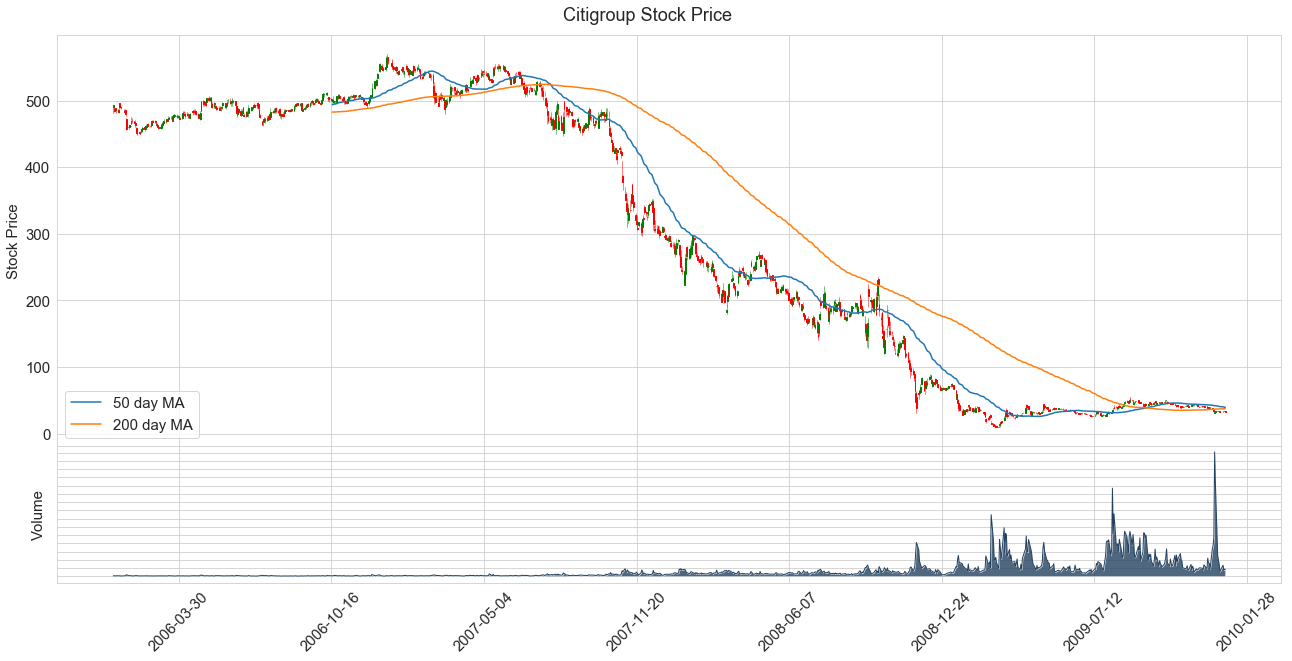

In [25]:
CitiCrisis=data.DataReader("C", 'yahoo', datetime.datetime(2006,1,1),datetime.datetime(2010,1,1))
CandleandSMA([CitiCrisis],['Citigroup'], 50,200 )

Another useful trading tool that is essential to technical analysis are the Bollinger Bands. Developed by John Bollinger in 1980's, Bollinger Bands measure volatility of the price by drawing a simple moving average of the stock( usually a 20 day SMA) as well as upper and lower bands, with each being 2 standard deviations above and below the SMA line. As the price becomes more volatile, the bands expand. Likewise, if the stock becomes bound to a tight trading pattern, the bands contract. Some notable expansions for the Citigroup stock happen in Decemeber 2006 as well as September 2008. Regarding contractions, from the graph below we see that a brief contraction occurs in February 2007, between a major expansion in January 2007 and a minor one in early March. Furthermore, the Bollinger Bands contract at the end of 2008.  

In [26]:

C['Close']['2006-01-01':'2009-01-01'].ta_plot(study='boll', period=20,boll_std=2,colors=['green','grey'])